<a href="https://colab.research.google.com/github/Oscar-chu/FX_Notebook/blob/main/forexAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install requests

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance
import requests

In [ ]:
def convert_to_datetime(df:pd.DataFrame,col:str):
  try:
    df[col] = pd.to_datetime(df[col])
    return df

  except ValueError:
    df[col] = pd.to_datetime(df[col], errors="coerce")
    count = df[col].isna().sum()
    print("There are {} rows failed to be converted to datetime".format(count))
    return df

def convert_to_numeric(df:pd.DataFrame,col:str):
  try:
    df[col] = pd.to_numeric(df[col])
    return df
  except ValueError:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    count  = df[col].isna().sum()
    print("There are {} rows failed to be converted to float".format(count))
    return df


There are 361 rows failed to be converted to float


<Axes: xlabel='Date', ylabel='2Y'>

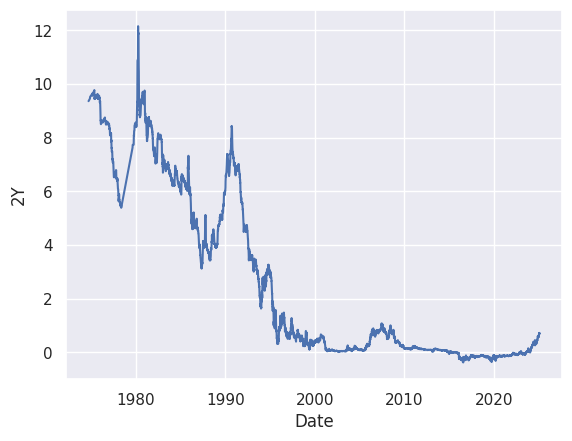

In [ ]:
df_jp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/jgbcme_all.csv",skiprows=[0])
df_jp = convert_to_datetime(df_jp,"Date")
df_jp = convert_to_numeric(df_jp,"2Y")
df_jp.dropna(subset=["2Y"],inplace=True)

sns.set_theme()
sns.lineplot(
    data=df_jp,
    x = "Date",
    y = "2Y",
)